# <center>The Rubik's Cube Group</center>
## <center>Andrew Dou, Mariah Laugesen, Ipsita Pathak</center>

# Intro to the Rubik's cube
The Rubik's cube looks like this:

<img src="attachment:scrumbled_rubik's_cube.jpg" style="max-width:100%">
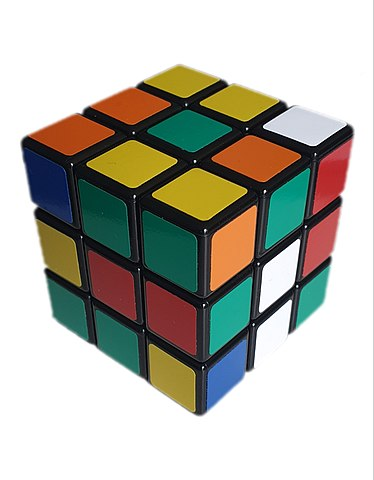

The goal is for each face of the cube to be all one color. The faces of the cube can be rotated clockwise or counterclockwise. Each colored square is called a facet, and each component cube is called a cubie.

# The Rubik’s Cube Group
Using Group Theory we can analyze a Rubik’s cube and study its various permutations.

# Singmaster notation
There are some terms that will be used to refer to the elements of a Rubik’s Cube.
* Cube: a short-handed version of Rubik’s Cube
* Cubie/piece: refers to the individual cuboid that makes up a cube. e.g. a Rubik’s Cube has 9 cubies/pieces on a face.
* Face: refers to an entire face of the whole Rubik’s Cube. e.g a Rubik’s Cube has 6 faces.
* Facet: refers to a face of a cubie that is visible to the player. e.g an edge cubie has 2 facets, and a corner cubie has 3 facets.

- Faces
    - $U$: the up/top face
    - $D$: the down/bottom face
    - $R$: the right face
    - $L$: the left face
    - $F$: the front face
    - $B$: the back face
- Moves
    - $U,D,R,L,F,B$
    - Clockwise quarter turns of the corresponding face
    - Apply right to left; $R \cdot U$ means $U$ then $R$
    - If $X$ is a clockwise rotation, $X^{-1} = X^3$ is the corresponding counterclockwise rotation
- Corners
    - Let $x, y, z \in \{ U,D,R,L,F,B \}$ be faces
    - The facet $x y z$ is on face $x$ such that clockwise rotation of that corner sends $x \to y \to z$
- Edges
    - A facet at $x y$ is on face $x$ such that a flip of the edge sends $x \to y$

# Sage’s Rubik’s cube group functions
SageMath has built-in functions for the Rubik's Cube group and methods for displaying and solving the cube. We can first initialize the cube. Its default state is its solved state. There is both a `RubiksCube()` object and a permutation group; they have different methods, so make sure you're using the right one.

In [1]:
groups.permutation.RubiksCube()

The Rubik's cube group with generators R,L,F,B,U,D in SymmetricGroup(48).

In [2]:
C = RubiksCube()
C

             +--------------+
             |  1    2    3 |
             |  4   top   5 |
             |  6    7    8 |
+------------+--------------+-------------+------------+
|  9  10  11 | 17   18   19 | 25   26  27 | 33  34  35 |
| 12 left 13 | 20  front 21 | 28 right 29 | 36 rear 37 |
| 14  15  16 | 22   23   24 | 30   31  32 | 38  39  40 |
+------------+--------------+-------------+------------+
             | 41   42   43 |
             | 44 bottom 45 |
             | 46   47   48 |
             +--------------+


In [3]:
C.plot3d()

Graphics3d Object

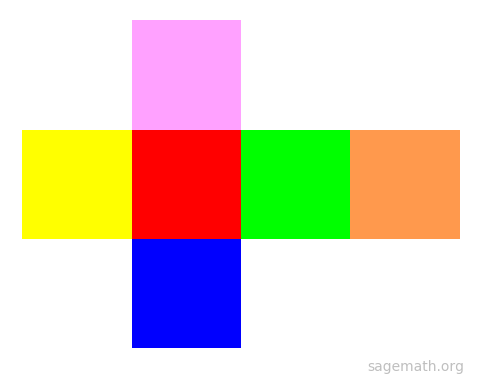

In [4]:
C.show()

## Different arrangements of the cube

The method `scramble(moves = 30)` returns the result of applying `moves` random moves to the cube.

In [5]:
C.scramble().plot3d()

Graphics3d Object

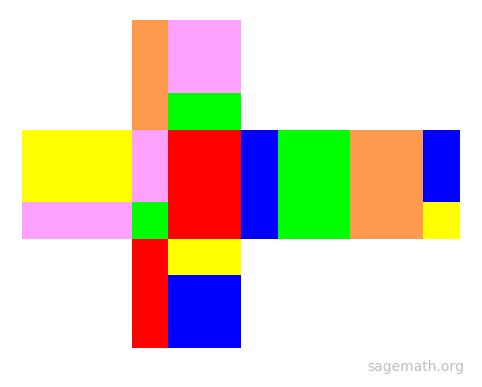

In [6]:
C.scramble(moves = 2).show()

To reach a certain permutation of the cube, apply the moves in singmaster notation to be cube.
The following example is the ‘superflip’ permutation which was proven to need at least 20 moves to solve.

In [7]:
C = RubiksCube('U^2*F*U^2*L*R^(-1)*F^2*U*F^3*B^3*R*L*U^2*R*D^3*U*L^3*R*D*R^3*L^3*D^2')
C

             +--------------+
             |  8   18    6 |
             | 26   top  10 |
             |  3   34    1 |
+------------+--------------+-------------+------------+
| 25   5  27 | 33    2   35 |  9    4  11 | 17   7  19 |
| 21 left 36 | 29  front 12 | 37 right 20 | 13 rear 28 |
| 30  45  32 | 38   47   40 | 14   44  16 | 22  42  24 |
+------------+--------------+-------------+------------+
             | 48   39   46 |
             | 31 bottom 15 |
             | 43   23   41 |
             +--------------+


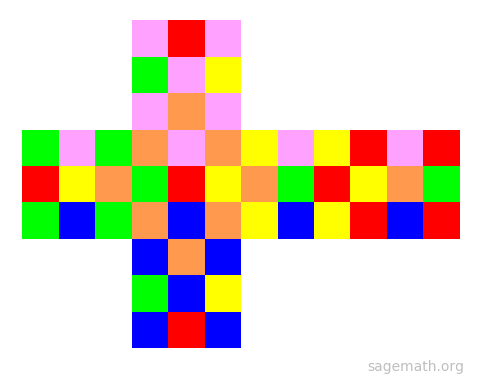

In [8]:
C.plot()

##### The Superflip is interesting because every single corner cube is solved (i.e. is in its place), and every single edge is flipped in its place.

## Order

In [9]:
C = groups.permutation.RubiksCube()

The order of a group is defined to be the cardinality of the underlying set i.e. the total number of permutations of a Rubik's cube.

In [10]:
C.order() # ~4.3 * 10^19 = 43 quintillion

43252003274489856000

Since we solve/scramble the Rubik’s Cube by turning the six faces, we know that the Rubik’s Cube Group can be generated by the six face turns $ \{U, D, L, R, F, B \}$.

In [11]:
C.gen_names()

['B', 'D', 'F', 'L', 'R', 'U']

In [12]:
C.display2d("")

             +--------------+
             |  1    2    3 |
             |  4   top   5 |
             |  6    7    8 |
+------------+--------------+-------------+------------+
|  9  10  11 | 17   18   19 | 25   26  27 | 33  34  35 |
| 12 left 13 | 20  front 21 | 28 right 29 | 36 rear 37 |
| 14  15  16 | 22   23   24 | 30   31  32 | 38  39  40 |
+------------+--------------+-------------+------------+
             | 41   42   43 |
             | 44 bottom 45 |
             | 46   47   48 |
             +--------------+



Sage has a function that gives the dictionary of faces created by the effect of the move given. So, if no move is given it returns the orgincal permutation.

In [13]:
C.faces("")

{'right': [[25, 26, 27], [28, 0, 29], [30, 31, 32]],
 'left': [[9, 10, 11], [12, 0, 13], [14, 15, 16]],
 'up': [[1, 2, 3], [4, 0, 5], [6, 7, 8]],
 'down': [[41, 42, 43], [44, 0, 45], [46, 47, 48]],
 'front': [[17, 18, 19], [20, 0, 21], [22, 23, 24]],
 'back': [[33, 34, 35], [36, 0, 37], [38, 39, 40]]}

In [14]:
C.faces("U*R*F")

{'right': [[19, 21, 3], [26, 0, 31], [43, 42, 41]],
 'left': [[48, 34, 35], [12, 0, 7], [14, 15, 6]],
 'up': [[38, 36, 33], [2, 0, 28], [1, 4, 25]],
 'down': [[11, 13, 24], [44, 0, 23], [46, 47, 22]],
 'front': [[9, 10, 8], [18, 0, 5], [17, 20, 30]],
 'back': [[27, 29, 32], [45, 0, 37], [16, 39, 40]]}

# Sage's algorithms to solve the Rubik's cube

Sage provides a method for solving the Rubik's cube, `solve(algorithm = 'hybrid', timeout = 15)`. You can specify the algorithm to use and how many seconds to go before timing out. The default is a hybrid: Kociemba until timeout, then Dietz.

In [15]:
C = RubiksCube('U^2*F*U^2*L*R^(-1)*F^2*U*F^3*B^3*R*L*U^2*R*D^3*U*L^3*R*D*R^3*L^3*D^2')
C.solve() # hybrid

"R2 U2 F D2 B L2 R2 B L2 B L' R U B2 L2 B' F' D2 R' U' D'"

### Kociemba
    
Categorizes a permutation of a Rubik’s cube into the subgroups
- $G_0 = \langle L, R, F, B, U, D \rangle $
- $G_1 = \langle L^2, R^2, F^2, B^2, U, D \rangle $
- $G_2 = \langle 1 \rangle $
    
where $G_0$ is the entire group, and $G_2$ only contains the solved state. The intermediate subgroups restrict some face turns to only 180° turns. The algorithm permutes the Rubik’s Cube from the top subgroup to the bottom subgroup.
    
Reasonable speed, not too many moves.

In [16]:
C.solve(algorithm = 'kociemba')

"R2 U2 F D2 B L2 R2 B L2 B L' R U B2 L2 B' F' D2 R' U' D'"

### Dietz
Fast but uses lots of moves.

In [17]:
C.solve(algorithm = 'dietz')

"U' R' R' U R U' R U D R R D' R' D R' D' R F R' B' R F' R' B R D R' U' R D' R' U R' B' R' B R' B' R R B R' U R U' R' B' R' B B R B' R' D' R' D R' F' R' F R D R D' R R U' R' U R F R F' R R U R' U' B R' B' R F' R' F R' U R U' U' R' U R' F R F' R' U' U' B D' B U F U' R"

### Optimal
An optimal solver program developed by Michael Reid which finds the smallest path using Kociemba's algorithm.

Takes a long time; always timed out when we tried to use it on the superflip cube.

In [18]:
RubiksCube().scramble(moves = 2).solve(algorithm = 'optimal')

Initializing tables...


Done.


"R2 U'"

### Gap
A computer algebra system for computational discrete algebra with particular emphasis on computational group theory.

In [19]:
C.solve(algorithm = 'gap')

"R2 U2 F D2 B L2 R2 B L2 B L' R U B2 L2 B' F' D2 R' U' D'"

## God's number
Maximum number of moves required to solve the Rubik's Cube. Proved to be 26 for quarter turns, or 20 for half turns.

# Relating Group Theory to Solving Rubik's Cube (by Hand)

In this section we will discuss some relationship between group theory and the steps for solving the Rubik's Cube by hand. First let us look at the most popular method for solving the cube by hand, CFOP, which stands for cross, first two layers (FLL), orienting the last layer (OLL), permuting the last layer (PLL).

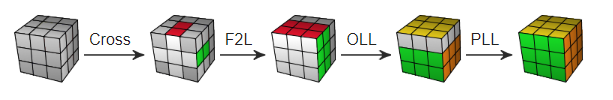

## Theorem: every permutation in the Rubik's Cube group is an even permutation. 

Before proving the theorem, we will first define what the parity of a permutation is. First, a permutation can be written using the cycle notation. For example, a permutation that rearranges $1,2,3,4$ to $4,1,2,3$ can be written as $(1, 2, 3, 4)$, which means $1$ is moved to the location of $2$, and $2$ is moved to $3$, and so on. A theorem from the basic group theory says that every such permutation can be written as a product of 2-cycles. The previous example can be written as $(1, 2)(1, 3)(1, 4)$.

Since every permutation consists of a sequence of face turns, we can prove the theorem by showing that each face turn is an even permutation of the cubies. Consider the quarter turn of the front face, which is denoted by $F$ using singmaster notation.

In [20]:
RubiksCube('F').show3d()

Graphics3d Object

In [21]:
print(RubiksCube())

             +--------------+
             |  1    2    3 |
             |  4   top   5 |
             |  6    7    8 |
+------------+--------------+-------------+------------+
|  9  10  11 | 17   18   19 | 25   26  27 | 33  34  35 |
| 12 left 13 | 20  front 21 | 28 right 29 | 36 rear 37 |
| 14  15  16 | 22   23   24 | 30   31  32 | 38  39  40 |
+------------+--------------+-------------+------------+
             | 41   42   43 |
             | 44 bottom 45 |
             | 46   47   48 |
             +--------------+



In [22]:
print(RubiksCube('F'))

             +--------------+
             |  1    2    3 |
             |  4   top   5 |
             | 25   28   30 |
+------------+--------------+-------------+------------+
|  9  10   8 | 19   21   24 | 43   26  27 | 33  34  35 |
| 12 left  7 | 18  front 23 | 42 right 29 | 36 rear 37 |
| 14  15   6 | 17   20   22 | 41   31  32 | 38  39  40 |
+------------+--------------+-------------+------------+
             | 11   13   16 |
             | 44 bottom 45 |
             | 46   47   48 |
             +--------------+



Looking just at the front face, we see that there are two sets of permutations: the rotation of the four corner cubies and that of the four edge pieces, each of which can be written as a product of three 2-cycles, so in total we get six 2-cycles, which means that the front face turn is even. The same argument can be applied to all other face turns.

A result of this theorem is that in the last step of CFOP, we could only have the following cases:

- Interchanging an even number of pairs (2-cycles)
- Any number of 3-cycles

Below are the first ten cases of PLL; the theorem holds indeed

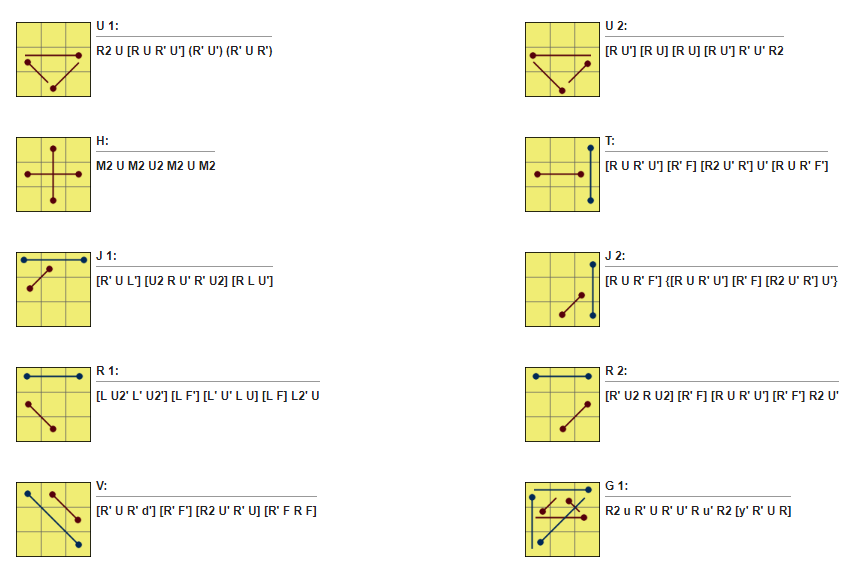
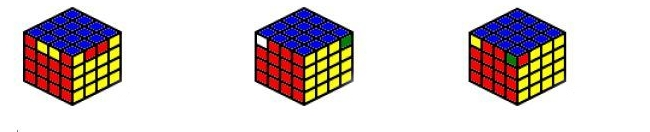

## Higher-Order Rubik's Cube
Nowadays Rubik's Cubes come in different sizes. A very common one is the Rubik's Revenge, which is a $4 \times 4 \times 4$ Rubik's Cube.

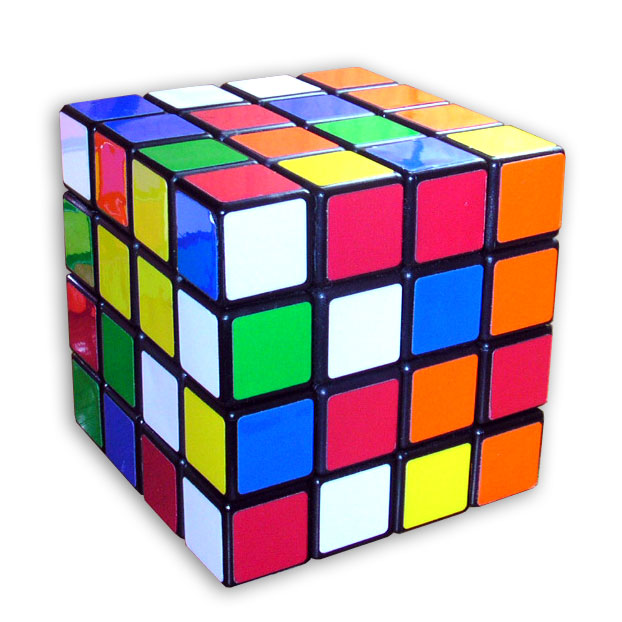

There are also even larger ones, such as $5 \times 5 \times 5$, $6 \times 6 \times 6$, and so on.

In general, to solve a higher-order cube, one will try to combine the edges and centers by colors, so that all the pieces on one edge have the same color, and all the ones in one ceter have the same color. Thus the higher-order Rubik's Cube gets reduced to a regular Rubik's Cube, and similar solving steps can be applied.

For the Rubik's Revenge, after combining the cubies, we get the following:

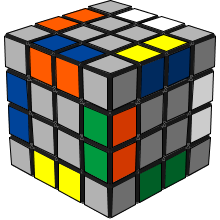

Now there is a homomorphism from the regular Rubik's Cube group to the $4 \times 4 \times 4$ restricted to only moveing the combined pieces to gether. However it is not an onto map, since there are special cases for the Rubik's Revenge.

The previous property is also useful for explaining the special cases that occurs for even-ordered Rubik's cubes. (i.e an $n$-by-$n$-by-$n$ cube, where $n>3$ is even.) Consider some cases involved in the last step (PLL) of solving a regular ($3 \times 3 \times 3$) Rubik's cube.

In [23]:
C1 = RubiksCube('R*U^(-1)*R)*U*(R*U*R*U^(-1))*(R^(-1)*U^(-1)*R^2)')
C1.show3d()

Graphics3d Object

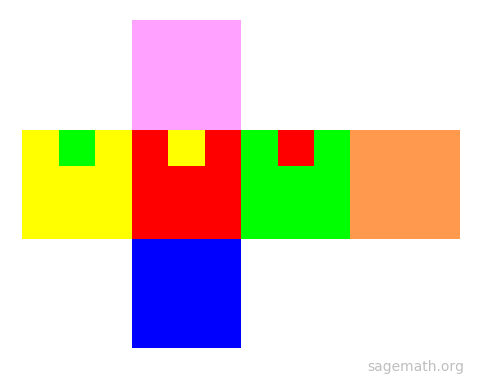

In [24]:
C1.show()

In this case the red edge cubie is moved to the green edge cubie's position, and the green moves to yellow, and yellow moves to red. So in a psudo-cycle notation we would have a 3-cycle $(R, G, Y)$, which is a product of two 2-cycles. So this case is permitted. You could see the steps applied to get to this permutation.

Similar to a regular Rubik's Cube, a fourth order cube's permutations are all, in fact, even. We could show this using similar arguments as before. However, in the last step there are some possible cases which are not permitted for the regular cube, which are shown in the following picture

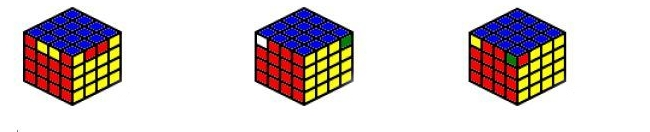.

In the left-most case, we are switching two edges, which would not happen in the regular case. In a regular cube's case, switching two edges only involves switching 2 cubies, making such permutation odd. However, here there are two pairs of cubies being interchanged, so the permutation is even and permitted. In the other two cases, it seems like that there are only two pieces being interchanged, making such permutation prohibited. This is due to the fact that for the fourth order cube, there is no one single cubie that stays right at the center of each face and does not move the entire time, instead, there are four center pieces which are indistinguishable and allowed to move around. The algorithm for solving these two special cases also involves interchanging a pair of cubies at the center, making it even.
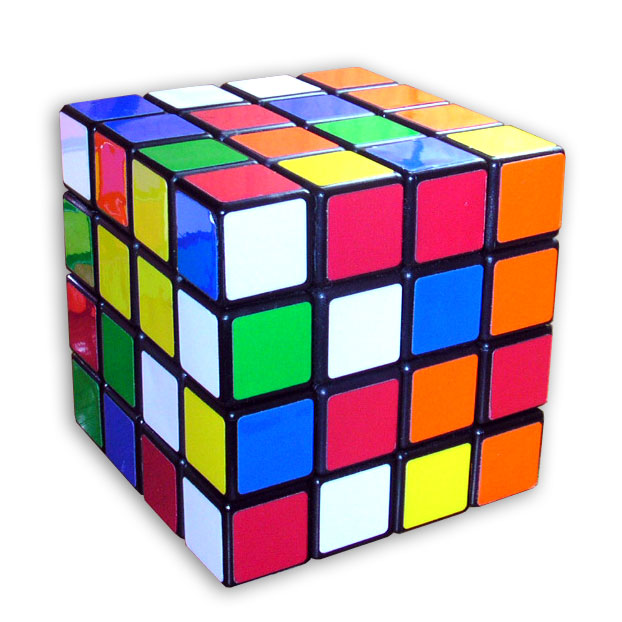
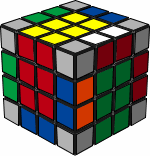
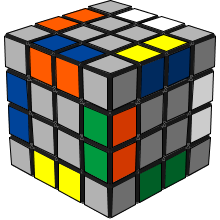

## Solving the Rubik's Cube Blindfolded
For those who are not satisfied enough, there is a more chanllenging way to solve the cube: blindfolded. To do so, one will not go layer by layer. However, due to the parity of the Rubik's Cube, the last step will still be either
- Interchanging an even number of pairs (2-cycles)
- Any number of 3-cycles

but they do not have to be in the same layer. For example,

In [25]:
C2 = RubiksCube('F*R*U^(-1)*R)*U*(R*U*R*U^(-1))*(R^(-1)*U^(-1)*R^2)*F^(-1)')
C2.show3d()

Graphics3d Object

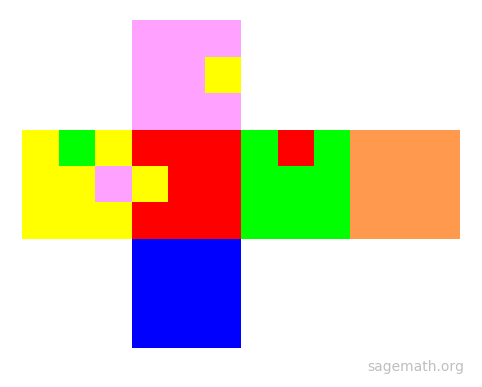

In [26]:
C2.show()

In this case we still need to rotate three cubies, similar to the PLL example above. However, these three cubies are not in the same layer now. 

For this situation, we will use what is commonly called as a set-up move, which can help us use the formula for the previous situation. In this case it is easy to see that rotating the front face puts the three cubies in the same layer.

In [27]:
C3 = C2.move('F')
C3.show3d()

Graphics3d Object

Now we can applied our known formula to perform this 3-cycle permutation. 

In [28]:
C4 = C3.move('(R^2 * U) * (R * U * R^(-1) * U^(-1)) * (R^(-1) * U^(-1)) * (R^(-1) * U * R^(-1))')
C4.show3d()

Graphics3d Object

Lastly, we reverse our F move. If we let Y denote the formula that we knew for permuting the three cubies in one layer, then what we were performing is essentially FYF^(-1). This is a conjugation of Y. As we knew, conjugation is an equivalence relation, and the conjugacy classes partitions the group.

In fact, the two formulas above (U1 and U2), which correspond to the clockwise and counterclockwise three-edge-piece rotations, respectively, give two conjugacy classes that cover all the three-edge-piece rotations encountered in solving the cube.

# SAT Solvers
SAT stands for satisfiability. An SAT solver is used to solve decision problems i.e. problems that require answers in the form of boolean values.

#### Here I will present the basic implementation of an SAT solver as is seen in this paper: 
https://sahandsaba.com/understanding-sat-by-implementing-a-simple-sat-solver-in-python.html

In [29]:
class SATInstance(object):
    def parse_and_add_clause(self, line):
        clause = []
        for literal in line.split():
            negated = 1 if literal.startswith('~') else 0
            variable = literal[negated:]
            if variable not in self.variable_table:
                self.variable_table[variable] = len(self.variables)
                self.variables.append(variable)
            encoded_literal = self.variable_table[variable] << 1 | negated
            clause.append(encoded_literal)
        self.clauses.append(tuple(set(clause)))
    def __init__(self):
        self.variables = []
        self.variable_table = dict()
        self.clauses = []

Such a problem has certain variables and literals (which are variables and their negations).
This class has the lists `variables` (which holds all the variables), `clauses` (which are sets of literals), and `variable_table` (which can be seen as a dictionary in which the keys are variables and the values are boolean values).

In [30]:
s = SATInstance()
s.parse_and_add_clause('A B ~C')
print(s.variable_table)

{'A': 0, 'B': 1, 'C': 2}


In [31]:
print(s.clauses)

[(0, 2, 5)]


A number of given clauses or conditions are passed through the SAT solver and it outputs a particular clause or set of literals that satisfies all of the given conditions.

#### Reading the output:
- `variable_table` stores a dictionary of the variables and each number assigned to it
- for every variable assigned to number $n$, $2n$ refers to its unnegated form and $2n + 1$ refers to its negated form

So by the given example, an acceptable solution is A (0), B (2) and not C (5).

By considering all possible clauses or conditions we DO want an SAT Solver can be used to output a clause that would satisfy all the given clauses.

Consider a 2x2x2 Rubik’s cube. It has 24 cubies each having an individual color and 6 4-cubied faces. We label the faces using the dictionary {0, 1, 2, 3, 4, 5} and label the 6 colors using the dictionary {A, B, C, D, E, F}. 

The idea is to run an SAT solver on each of the 6 faces such that if all colors on that face are different (say A, B, C, and D), the variables of the SAT Solver are initially set to be {A, B, C, D}. The program randomly picks two colors, say A and B, and replaces all colors in the square that aren’t A with B. Now the SAT Solver’s variables are updated to be {A, B}. By doing so, we are picking A to be the color that we want this face to be. Now, we have our first clauses {A, A, A, A} and {~B, ~B, ~B, ~B}. The remaining clauses would be dependent on the structure of the Rubik’s cube i.e. how it can be rotated to get particular colors at the four positions on this specific face. One way of understanding this is by looking at how it can be rotated. From the diagram we can see the directions it can be rotated in and each unit refers to a shift of one square.

<img src="2x2x2.png" style="max-width:50%">.

The program that selects colors in each step must also keep track of while color has already been used for a face. The purpose of having such an SAT Solver is to find a way of solving the Rubik's Cube in less time, so this idea can be extended to Cubes that do not have Sage functions to solve, such as 4x4x4 cubes.